In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

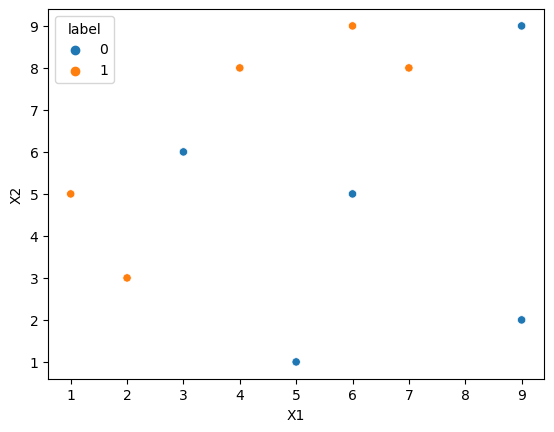

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [11]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

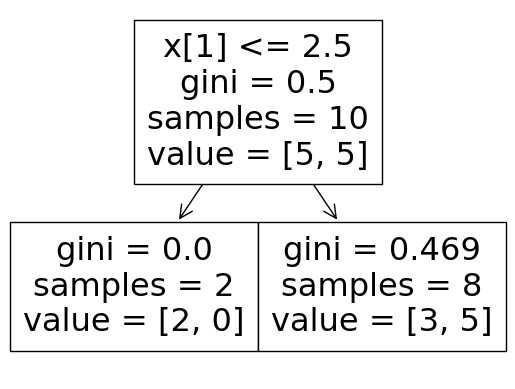

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

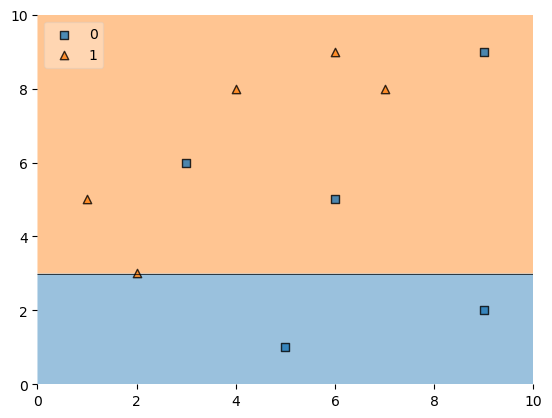

In [13]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [17]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [21]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    
    else:
        return row['weights'] * np.exp(alpha)

In [22]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [24]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum() 

In [25]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [26]:
df['normalized_weights'].sum()

1.0

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [28]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [29]:
df[['X1','X2','label','weights','y_pred','updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [30]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [31]:
index_values = create_new_dataset(df)
index_values

[6, 6, 2, 1, 8, 9, 9, 2, 5, 0]

In [32]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [33]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1


In [34]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [35]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [36]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

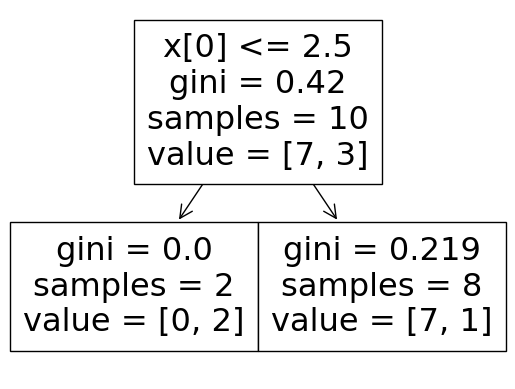

In [37]:
from sklearn.tree import plot_tree
plot_tree(dt2)

<Axes: >

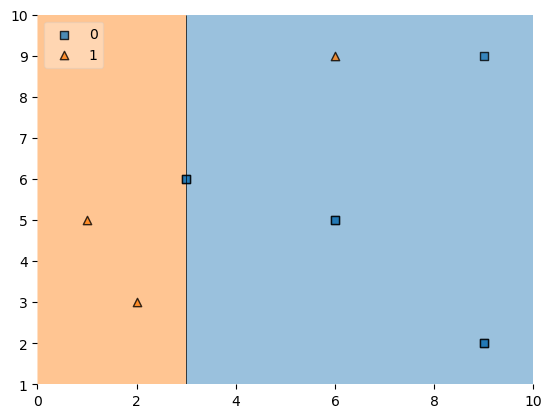

In [38]:
plot_decision_regions(X,y, clf=dt2, legend=2)

In [39]:
second_df['y_pred'] = dt2.predict(X)

In [40]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
1,2,3,1,0.1,1
8,9,9,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
0,1,5,1,0.1,1


In [42]:
alpha2 = calculate_model_weight(0.1)

In [43]:
alpha2

1.0986122886681098

In [44]:
def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    
    else:
        return row['weights'] * np.exp(alpha)

In [45]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
0,1,5,1,0.1,1,0.033622


In [47]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum() 

In [48]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034


In [49]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [50]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [51]:
second_df[['X1','X2','label','weights','y_pred','updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.033622,0.000000,0.056034
6,6,5,0,0.1,0,0.033622,0.056034,0.112068
2,3,6,0,0.1,0,0.033622,0.112068,0.168102
1,2,3,1,0.1,1,0.033622,0.168102,0.224136
8,9,9,0,0.1,0,0.033622,0.224136,0.280170
9,9,2,0,0.1,0,0.033622,0.280170,0.336204
9,9,2,0,0.1,0,0.033622,0.336204,0.392238
2,3,6,0,0.1,0,0.033622,0.392238,0.448272
5,6,9,1,0.1,0,0.297427,0.448272,0.943966
0,1,5,1,0.1,1,0.033622,0.943966,1.000000


In [52]:
def create_new_dataset(second_df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [53]:
index_values = create_new_dataset(second_df)
index_values

[8, 9, 6, 9, 2, 9, 6, 2, 6, 8]

In [55]:
print(alpha1, alpha2)

0.42364893019360184 1.0986122886681098


In [57]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [58]:
dt2.predict(query)

array([1], dtype=int64)

In [59]:
alpha1*1 + alpha2*1

1.5222612188617117